In [6]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

In [10]:
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\acer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\acer/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\acer/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer/nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [8]:
sentence = "Mero iPhone 13 Rs 90,000 ma cha."

tokens = word_tokenize(sentence)

tokens

['Mero', 'iPhone', '13', 'Rs', '90,000', 'ma', 'cha', '.']

In [11]:
tagged_tokens = pos_tag(tokens)

In [12]:
tagged_tokens

[('Mero', 'NNP'),
 ('iPhone', 'NN'),
 ('13', 'CD'),
 ('Rs', 'NNP'),
 ('90,000', 'CD'),
 ('ma', 'NN'),
 ('cha', 'NN'),
 ('.', '.')]

In [13]:
named_entities = ne_chunk(tagged_tokens)

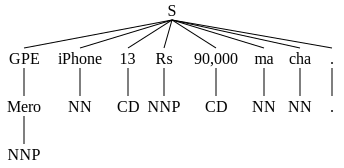

In [19]:
named_entities

In [15]:
# Example training data for custom NER model (using BIO format)
training_data = [
    (["Mero", "iPhone", "13", "Rs", "90,000", "ma", "cha"], ["O", "B-Product", "I-Product", "B-Price", "I-Price", "O", "O"]),
    (["Nike", "ko", "juto", "haru", "Rs", "3,000", "ma"], ["B-Brand", "O", "B-Product", "O", "B-Price", "I-Price", "O"]),
    # Add more training samples...
]

# Extract features (word, POS tag, previous/next word, etc.)
def extract_features(sentence, index):
    word = sentence[index]
    features = {
        'word': word,
        'is_capitalized': word[0].isupper(),
        'previous_word': sentence[index-1] if index > 0 else None,
        'next_word': sentence[index+1] if index < len(sentence)-1 else None,
    }
    return features

# Create feature sets
featuresets = [(extract_features(sentence, i), label) for sentence, labels in training_data for i, (word, label) in enumerate(zip(sentence, labels))]

# Train a classifier (e.g., Maximum Entropy classifier)
from nltk.classify import MaxentClassifier
classifier = MaxentClassifier.train(featuresets)


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.79176        0.429
             2          -0.76557        1.000
             3          -0.49475        1.000
             4          -0.36451        1.000
             5          -0.28836        1.000
             6          -0.23847        1.000
             7          -0.20329        1.000
             8          -0.17715        1.000
             9          -0.15697        1.000
            10          -0.14093        1.000
            11          -0.12786        1.000
            12          -0.11702        1.000
            13          -0.10788        1.000
            14          -0.10006        1.000
            15          -0.09331        1.000
            16          -0.08741        1.000
            17          -0.08221        1.000
            18          -0.07760        1.000
            19          -0.07348        1.000
 

In [16]:
import pickle
with open('ecommerce_ner_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [17]:
with open('ecommerce_ner_classifier.pkl', 'rb') as f:
    classifier = pickle.load(f)

# Example test sentence
test_sentence = ["Mero", "iPhone", "14", "Rs", "100,000", "ma", "cha"]

# Predict labels for each word in the test sentence
for i, word in enumerate(test_sentence):
    features = extract_features(test_sentence, i)
    predicted_label = classifier.classify(features)
    print(f"{word}: {predicted_label}")

Mero: O
iPhone: B-Product
14: I-Product
Rs: B-Price
100,000: I-Price
ma: O
cha: O


In [18]:
# Example test sentence
test_sentence = ["Redmi", "Note9", "Pro", "ko", "price", "kati", "ho"]

# Predict labels for each word in the test sentence
for i, word in enumerate(test_sentence):
    features = extract_features(test_sentence, i)
    predicted_label = classifier.classify(features)
    print(f"{word}: {predicted_label}")

Redmi: O
Note9: B-Price
Pro: B-Brand
ko: O
price: B-Product
kati: O
ho: O
